In [13]:
from flair.embeddings import WordEmbeddings, Sentence

from flair.embeddings import FlairEmbeddings, ELMoEmbeddings, DocumentEmbeddings, BertEmbeddings

# init embedding
bert_embedding = BertEmbeddings('bert-base-uncased')


  8%|▊         | 31395840/407873900 [00:12<02:28, 2540778.15B/s]


 15%|█▌        | 62361600/407873900 [00:25<02:16, 2533214.85B/s]


 25%|██▍       | 101191680/407873900 [00:40<02:00, 2541351.96B/s]


 32%|███▏      | 132075520/407873900 [00:52<01:49, 2511070.28B/s]


 42%|████▏     | 170840064/407873900 [01:08<01:33, 2539061.17B/s]


 50%|████▉     | 203919360/407873900 [01:21<01:20, 2536421.04B/s]


 59%|█████▉    | 239912960/407873900 [01:35<01:06, 2524418.55B/s]


 66%|██████▋   | 270831616/407873900 [01:47<00:54, 2537031.81B/s]


 75%|███████▌  | 306728960/407873900 [02:01<00:39, 2539860.65B/s]


 84%|████████▍ | 342888448/407873900 [02:15<00:25, 2543565.15B/s]


 92%|█████████▏| 375394304/407873900 [02:28<00:12, 2536107.05B/s]


100%|█████████▉| 406409216/407873900 [02:40<00:00, 2540397.16B/s]


100%|██████████| 407873900/407873900 [02:41<00:00, 2526651.22B/s]

In [16]:
# create a sentence
sentence = Sentence('The grass is green .', use_tokenizer = True)

# embed words in sentence
bert_embedding.embed(sentence)

for i, token in enumerate(sentence):
                    #print(token)
                    token_embedding = token.embedding
                    print(token_embedding)

tensor([-0.0323, -0.3904, -1.1946,  ...,  0.1305, -0.1365, -0.4323])
tensor([-0.3973,  0.2652, -0.1337,  ...,  0.3715,  0.1097, -1.1625])
tensor([ 0.1374, -0.3688, -0.8292,  ...,  0.2533,  0.0294,  0.4293])
tensor([-0.7722, -0.1152,  0.3661,  ...,  0.1575, -0.0682, -0.7661])
tensor([ 0.1441, -0.1772, -0.5911,  ..., -1.4830,  0.1995, -0.0112])


In [ ]:
import flair

In [11]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentPoolEmbeddings, Sentence

# initialize the word embeddings
#glove_embedding = WordEmbeddings('glove')
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([#glove_embedding,
                                              flair_embedding_backward,
                                              flair_embedding_forward])

In [13]:
# create an example sentence
sentence = Sentence('The grass is green . And the sky is blue .')

# embed the sentence with our document embedding
document_embeddings.embed(sentence)

embedding_of_sentence = sentence.get_embedding()
# now check out the embedded sentence.
print(document_embeddings.embedding_length)
print('Embedding model', document_embeddings)

4096
Embedding model DocumentPoolEmbeddings(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
)


In [ ]:
from flair.data import Corpus
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

In [ ]:
from typing import List, Dict, Union
import logging
log = logging.getLogger("flair")

In [ ]:
class Dictionary:
    """
    This class holds a dictionary that maps strings to IDs, used to generate one-hot encodings of strings.
    """

    def __init__(self, add_unk=True):
        # init dictionaries
        self.item2idx: Dict[str, int] = {}
        self.idx2item: List[str] = []
        self.multi_label: bool = False

        # in order to deal with unknown tokens, add <unk>
        if add_unk:
            self.add_item("<unk>")

    def add_item(self, item: str) -> int:
        """
        add string - if already in dictionary returns its ID. if not in dictionary, it will get a new ID.
        :param item: a string for which to assign an id.
        :return: ID of string
        """
        item = item.encode("utf-8")
        if item not in self.item2idx:
            self.idx2item.append(item)
            self.item2idx[item] = len(self.idx2item) - 1
        return self.item2idx[item]

    def get_idx_for_item(self, item: str) -> int:
        """
        returns the ID of the string, otherwise 0
        :param item: string for which ID is requested
        :return: ID of string, otherwise 0
        """
        item = item.encode("utf-8")
        if item in self.item2idx.keys():
            return self.item2idx[item]
        else:
            return 0

    def get_items(self) -> List[str]:
        items = []
        for item in self.idx2item:
            items.append(item.decode("UTF-8"))
        return items

    def __len__(self) -> int:
        return len(self.idx2item)

    def get_item_for_index(self, idx):
        return self.idx2item[idx].decode("UTF-8")

    def save(self, savefile):
        import pickle

        with open(savefile, "wb") as f:
            mappings = {"idx2item": self.idx2item, "item2idx": self.item2idx}
            pickle.dump(mappings, f)

    @classmethod
    def load_from_file(cls, filename: str):
        import pickle

        dictionary: Dictionary = Dictionary()
        with open(filename, "rb") as f:
            mappings = pickle.load(f, encoding="latin1")
            idx2item = mappings["idx2item"]
            item2idx = mappings["item2idx"]
            dictionary.item2idx = item2idx
            dictionary.idx2item = idx2item
        return dictionary

    @classmethod
    def load(cls, name: str):
        from flair.file_utils import cached_path

        if name == "chars" or name == "common-chars":
            base_path = "https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models/common_characters"
            char_dict = cached_path(base_path, cache_dir="datasets")
            return Dictionary.load_from_file(char_dict)

        return Dictionary.load_from_file(name)

In [ ]:
from flair.file_utils import Tqdm
def make_label_dictionarya(self) -> Dictionary:
        """
        Creates a dictionary of all labels assigned to the sentences in the corpus.
        :return: dictionary of labels
        """
        label_dictionary: Dictionary = Dictionary(add_unk=False)
        label_dictionary.multi_label = False

        from datasets import DataLoader

        loader = DataLoader(self.train, batch_size=1)

        log.info("Computing label dictionary. Progress:")
        for batch in Tqdm.tqdm(iter(loader)):

            for sentence in batch:
 

                for label in sentence.labels:
                    label_dictionary.add_item(label.value)

                if not label_dictionary.multi_label:
                    if len(sentence.labels) > 1:
                        label_dictionary.multi_label = True

        log.info(label_dictionary.idx2item)

        return label_dictionary

In [ ]:
from data import Corpus
from datasets import ClassificationCorpus

# this is the folder in which train, test and dev files reside
data_folder = './'

# load corpus containing training, test and dev data
corpus: Corpus = ClassificationCorpus(data_folder,
                                      test_file='test.txt',
                                      dev_file='dev.txt',
                                      train_file='train.txt')


# 2. create the label dictionary
label_dict = make_label_dictionarya(corpus)
print(get_label_distribution(corpus))

# 3. make a list of word embeddings
word_embeddings = [WordEmbeddings('glove'),

                   # comment in flair embeddings for state-of-the-art results
                   # FlairEmbeddings('news-forward'),
                   # FlairEmbeddings('news-backward'),
                   ]

In [ ]:
# 4. initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )

# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train('resources/taggers/ag_news',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=150)

In [ ]:
from flair.embeddings import FlairEmbeddings
from flair.data import Sentence

# init embedding
flair_embedding_forward = FlairEmbeddings(model = 'news-forward')

print('pt loaded')

# create a sentence


In [ ]:
sentence = Sentence('The grass is green .')

# embed words in sentence
flair_embedding_forward.embed(sentence)

for token in sentence:
    token_embedding = token.embedding
    print(token_embedding)

In [ ]:
#embedding = ELMoEmbeddings('small')
glove_embedding = WordEmbeddings('glove')

sentence = Sentence('the grass is green .')

glove_embedding.embed(sentence)

In [ ]:
for token in sentence:
    print(token.embedding)

## Sentences segmentation

In [ ]:
text = "This is a sentence. This is another sentence."

from segtok.segmenter import split_single
#sentences = [Sentence(sent, use_tokenizer=True) for sent in split_single(text)]
sentences = [sent for sent in split_single(text)]

In [ ]:
print(sentences)

In [ ]:
flair_embedding_forward.embed(sentences)

In [ ]:
for indiv_sentence in sentences:
    for token in indiv_sentence:
        print(token.embedding)

## Glove

In [ ]:
import bcolz
import numpy as np
import pickle

In [ ]:


words = []
idx = 0
word2idx = {}
vectors = bcolz.carray(np.zeros(1), rootdir=f'./Data/6B.100.dat', mode='w')

with open(f'./Data/glove.6B.100d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)
    
vectors = bcolz.carray(vectors[1:].reshape((400000, 100)), rootdir=f'./Data/6B.100.dat', mode='w')
vectors.flush()
pickle.dump(words, open(f'./Data/6B.100_words.pkl', 'wb'))
pickle.dump(word2idx, open(f'./Data/6B.100_idx.pkl', 'wb'))

In [ ]:
vectors = bcolz.open(f'./Data/6B.100.dat')[:]
words = pickle.load(open(f'./Data/6B.100_words.pkl', 'rb'))
word2idx = pickle.load(open(f'./Data/6B.100_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}

In [ ]:
glove['the']

In [ ]:
from segtok.tokenizer import split_contractions
from segtok.tokenizer import word_tokenizer

In [ ]:
import h5py
from itertools import *
import matplotlib.pyplot as plt
plt.style.use("ggplot")

hdf5_file='./HDF5_files/hdf5_10.hdf5'
h5_file = h5py.File(hdf5_file, "r")
ocr = h5_file.get('train_ocrs')

In [ ]:
contractions_full = []
for counter, text in enumerate(ocr):
    contractions = split_contractions(word_tokenizer(text))
    for element in contractions:
        element = element.lower()
        contractions_full.append(element)

In [ ]:
print(contractions_full)
target_vocab = contractions_full

In [ ]:
emb_dim =100
matrix_len = len(target_vocab)
print(matrix_len)
weights_matrix = np.zeros((matrix_len, 100))
words_found = 0

In [ ]:
target_vocab[1]

In [ ]:
for i, word in enumerate(target_vocab):
    try: 
        weights_matrix[i] = glove[word]
        words_found += 1
    except KeyError:
        weights_matrix[i] = np.random.normal(scale=0.6, size=(emb_dim, ))

In [ ]:
weights_matrix[1]

In [ ]:
words_found

In [ ]:
def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings, embedding_dim = weights_matrix.size()
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.load_state_dict({'weight': weights_matrix})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, num_embeddings, embedding_dim

In [ ]:
import torch

In [ ]:
from mobilenetv3 import mobilenetv3_large, mobilenetv3_small

net_large = mobilenetv3_large()

net_large.load_state_dict(torch.load('./pretrained/mobilenetv3-large-657e7b3d.pth',map_location='cpu'))

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
from models.imagenet import mobilenetv2
import torch.nn as nn

In [ ]:
net = mobilenetv2()
net.load_state_dict(torch.load('pretrained/mobilenetv2_1.0-0c6065bc.pth', map_location='cpu'))
feature_extracting = True
set_parameter_requires_grad(net, feature_extracting)

In [ ]:
net.classifier = nn.Linear(1280, 300)

In [ ]:
print(net.classifier)

In [ ]:
params_to_update = net.parameters()
print("Params to learn:")
if feature_extracting:
    params_to_update = []
    for name,param in net.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in net.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class CNN_Text(nn.Module):
    
    def __init__(self, image_model):
        super(CNN_Text, self).__init__()
        #self.args = args
        
        #V = args.embed_num
        D = 2048 #embed_dim, 4196 for doc_embeddings
        C = 10 #class_num
        Ci = 1
        Co = 100 #kernel_num -> number of kernel with the same size
        Ks = [3,4,5] #kernel_sizes -> size = number of words

        #self.embed = nn.Embedding(V, D)
        # self.convs1 = [nn.Conv2d(Ci, Co, (K, D)) for K in Ks]
        self.convs1 = nn.ModuleList([nn.Conv2d(Ci, Co, (K, D)) for K in Ks])
        
        
        '''
        self.conv13 = nn.Conv2d(Ci, Co, (3, D))
        self.conv14 = nn.Conv2d(Ci, Co, (4, D))
        self.conv15 = nn.Conv2d(Ci, Co, (5, D))
        '''
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(len(Ks)*Co, C)
        
        self.image_model = image_model

    def conv_and_pool(self, x, conv):
        x = F.relu(conv(x)).squeeze(3)  # (N, Co, W)
        x = F.max_pool1d(x, x.size(2)).squeeze(2)
        
        #Output will be size (1,Ks*Co) -> Maxpool will get one ĉ value =  max(c_1,c_2...), where c_i is
        #the result of the convolution operation of the kernel over the input
        
        return x
    
    

    def forward(self, x, x2):
        #x = self.embed(x)  # (N, W, D)
        
        #if self.args.static:
            #x = Variable(x)
        #print('CNN Text entry',x.shape)

        x = x.unsqueeze(1)  # (N, Ci, W, D)
        #print('unsqueeze',x.shape)
        
        
        #print(x.shape)

        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1]  # [(N, Co, W), ...]*len(Ks)
        

        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  # [(N, Co), ...]*len(Ks)
        

        x = torch.cat(x, 1) #[1,100] + [1,100] + [1,100] = [1,300]
        
        #print('After cat', x.shape)

        '''
        x1 = self.conv_and_pool(x,self.conv13) #(N,Co)
        x2 = self.conv_and_pool(x,self.conv14) #(N,Co)
        x3 = self.conv_and_pool(x,self.conv15) #(N,Co)
        x = torch.cat((x1, x2, x3), 1) # (N,len(Ks)*Co)
        '''
        x = self.dropout(x)  # (N, len(Ks)*Co)
        
        x2 = self.image_model(x2)
        
        x2 = torch.cat((x,x2),1)
        
        
        logit = x2
        #logit = self.fc1(x)  # (N, C)
        return logit

In [ ]:
text_model = CNN_Text(net)


In [ ]:
print(text_model)

In [ ]:
base_path = './resources/combined'
flair_embedding_forward = FlairEmbeddings('./Data/news-forward-0.4.1.pt')

# Dataset creation with image directory, image -> 'RGB' -> transformed to Mobilenetv2 input, Ocr,
# Class and Segmentation
__all__ = ['MobileNetV2', 'mobilenetv2_19']

data_transforms = {
        'train': transforms.Compose([
            transforms.Resize(256),
            transforms.RandomCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])}
#Independent train and test transformations can be done
h5_dataset = H5Dataset(path='./HDF5_files/hdf5_small_tobacco_cover.hdf5', data_transforms=data_transforms['train'], embedding_model = flair_embedding_forward, phase = 'train')

dataloader_train = DataLoader(h5_dataset, batch_size=1, shuffle=False, num_workers=0)
# for x in dataloader:
#     x = x.to('cuda', non_blocking=True)

#https://github.com/d-li14/mobilenetv2.pytorch
net = mobilenetv2()
net.load_state_dict(torch.load('pretrained/mobilenetv2_1.0-0c6065bc.pth'))
feature_extracting = True
set_parameter_requires_grad(net, feature_extracting)
net.classifier = nn.Linear(1280, 300)

# get model
model = CNN_Text(net)
#print(model)
# define loss function
criterion = nn.CrossEntropyLoss()
# set optimize
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.00004)

max_epochs = 1
optimizer = optimizer_ft
batch_size=1
running_loss = 0.0
loss_values = []
epoch_values = []

# Loop over epochs
for epoch in range(max_epochs):
    running_loss = 0
    steps = 0
    # Training
    print('Antes del loop')
    for local_batch in dataloader_train:
        image, ocr_text, labels = Variable(local_batch['image']), Variable(local_batch['ocr']), Variable(local_batch['class'])
        #print(ocr_text.shape)
        steps += 1
        if ocr_text.shape[1]< 5:
            print(steps)
            pass
        else:
            # zero the parameter gradients
            optimizer.zero_grad()
            #print(local_batch['image_dir'])

            # forward
            outputs = model(ocr_text, image)
            _, preds = torch.max(outputs.data, 1)
            #print(preds, labels.long())
            loss = criterion(outputs, labels.long())
            #print(outputs)

            # backward + optimize only if in training phase
            loss.backward()
            optimizer.step()
            #running_loss += loss.data[0]
            if steps % 100 == 0:
                print(steps)
                #save(model,'./snapshot/', 'model', steps)
            running_loss += loss.item()

    #print(outputs)
    print('[Epoch {}/{}], loss {}'.format(
                    epoch, max_epochs,running_loss/800))

    loss_values.append(running_loss/800)
    epoch_values.append(epoch)

## Tobaco3482 dataset

In [6]:
import csv
import pandas as pd

file_read = open('./Data/Small_Tobacco_cover_final.csv', "rU")
reader = csv.reader(file_read, delimiter=',')
df = []

for element in reader:
    clase = int(element[1])
    if(clase == 0): 
        cat = 'Resume'
    elif(clase == 1):
        cat = 'News'
    elif(clase == 2):
        cat = 'Scientific'
    elif(clase == 3):
        cat = 'Email'
    elif(clase == 4):
        cat = 'ADVE'
    elif(clase == 5):
        cat = 'Memo'
    elif(clase == 6):
        cat = 'Report'
    elif(clase == 7):
        cat = 'Form'
    elif(clase == 8):
        cat = 'Note'
    elif(clase == 9):
        cat = 'Letter'
    new_row = [element[0],cat, element[2],element[3]]
    df.append(new_row)
    
file_read.close()

print(reader)
columns = ['img_dir','class', 'label', 'ocr_dir']
df = pd.DataFrame(df, columns = columns)
df = df.sample(frac=1).reset_index(drop=True)
df

/home/bscuser/anaconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


,img_dir,class,label,ocr_dir
0,./SmallTobacco/imagesz/z/z/f/zzf14d00/50792073...,Form,1,./SmallTobacco/imagesz/z/z/f/zzf14d00/50792073...
1,./SmallTobacco/imagesz/z/z/a/zza81f00/20250286...,News,1,./SmallTobacco/imagesz/z/z/a/zza81f00/20250286...
2,./SmallTobacco/imagesz/z/z/g/zzg02a00/20263748...,Memo,1,./SmallTobacco/imagesz/z/z/g/zzg02a00/20263748...
3,./SmallTobacco/imagesz/z/z/y/zzy05d00/50568895...,Letter,1,./SmallTobacco/imagesz/z/z/y/zzy05d00/50568895...
4,./SmallTobacco/imagesz/z/z/w/zzw20e00/89282835...,Memo,1,./SmallTobacco/imagesz/z/z/w/zzw20e00/89282835...
5,./SmallTobacco/imagesz/z/z/k/zzk44e00/20221810...,Memo,1,./SmallTobacco/imagesz/z/z/k/zzk44e00/20221810...
6,./SmallTobacco/imagesz/z/z/x/zzx30c00/ti063906...,Letter,1,./SmallTobacco/imagesz/z/z/x/zzx30c00/ti063906...
7,./SmallTobacco/imagesz/z/z/p/zzp05a00/53023762...,Email,1,./SmallTobacco/imagesz/z/z/p/zzp05a00/53023762...
8,./SmallTobacco/imagesz/z/z/a/zza19d00/50241753...,Report,1,./SmallTobacco/imagesz/z/z/a/zza19d00/50241753...
9,./SmallTobacco/imagesz/z/z/p/zzp14d00/50777881...,Report,1,./SmallTobacco/imagesz/z/z/p/zzp14d00/50777881...


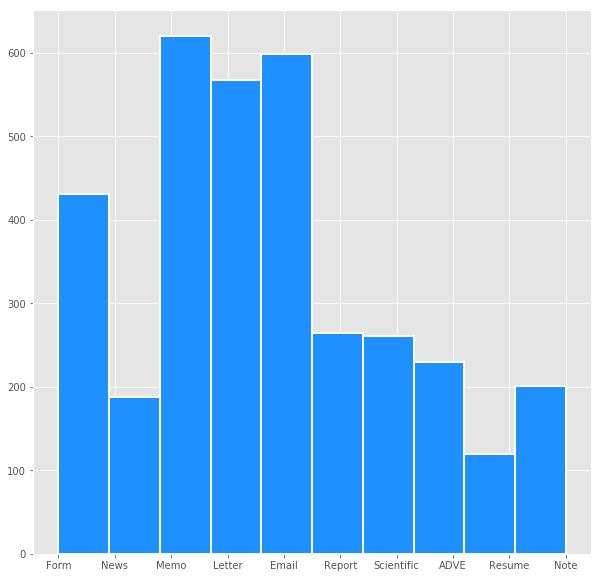

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("ggplot")

df_class = df['class']
df_class = df_class.values

fig = plt.figure(figsize=(10,10))
plt.hist([s for s in df_class], bins=10, color = "dodgerblue", lw=2, ec="white")
#label.set_horizontalalignment('right')
plt.show()


In [180]:

values = df.values
test_sample = []
train_sample = []
test_samples = 0
classes = ['Resume','News','Scientific','Email','ADVE','Memo','Report','Form','Note','Letter']
for clas in classes:
    counter = 0
    for row in values:
        if row[1] == clas and counter < 100:
            counter += 1
            new_row = [row[0], row[1], row[2], row[3]]
            train_sample.append(new_row)
            
for row in values:
    counter = 0
    for element in train_sample:
        if row[0] != element[0]:
            counter += 1
        if counter == len(train_sample):
            new_row = [row[0], row[1], row[2], row[3]]
            test_sample.append(new_row)
            


In [181]:
import random
random.shuffle(test_sample)
random.shuffle(train_sample)

In [182]:
train_sample[0]
#len(train_sample)

['./SmallTobacco/imagesz/z/z/d/zzd40d00/518288917+-8918_0.png',
 'Letter',
 '1',
 './SmallTobacco/imagesz/z/z/d/zzd40d00/518288917+-8918_0.txt']

In [173]:
len(test_sample)

2551

In [183]:
file_read = open('./Data/Small_Tobacco_cover.csv', "rU")
reader = csv.reader(file_read, delimiter=',')

df = []

for element in reader:
    new_row = [element[0],element[1], element[2],element[3]]
    df.append(new_row)

file_read.close()

columns = ['img_dir','class', 'label', 'ocr_dir']
df = pd.DataFrame(df, columns = columns)
df = df.sample(frac=1).reset_index(drop=True) #shuffle

values = df.values
train_sample = []
test_sample = []
classes = ['0','1','2','3','4','5','6','7','8','9']
for clas in classes:
    counter = 0
    for row in values:
        if row[1] == clas and counter < 100:
            counter += 1
            new_row = [row[0], row[1], row[2], row[3]]
            train_sample.append(new_row)
            
for row in values:
    counter = 0
    for element in train_sample:
        if row[0] != element[0]:
            counter += 1
        if counter == len(train_sample):
            new_row = [row[0], row[1], row[2], row[3]]
            test_sample.append(new_row)
import random
random.shuffle(test_sample)
random.shuffle(train_sample)

/home/bscuser/anaconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [184]:
#Original label csv reading into list
addrs = []
labels = []
segmentation = []
ocr_dirs = []
for row in train_sample:
      adress = row[0]
      lab = int(row[1])
      seg = int(row[2])
      ocr = row[3]
      #label = np.array(label).astype(int)
      addrs.append(adress)
      labels.append(lab)
      segmentation.append(seg)
      ocr_dirs.append(ocr)

for row in test_sample:
      adress = row[0]
      lab = int(row[1])
      seg = int(row[2])
      ocr = row[3]
      #label = np.array(label).astype(int)
      addrs.append(adress)
      labels.append(lab)
      segmentation.append(seg)
      ocr_dirs.append(ocr)

In [185]:
len(addrs)

3551

In [186]:
labels

[7,
 8,
 6,
 1,
 5,
 2,
 0,
 3,
 3,
 8,
 9,
 9,
 3,
 8,
 9,
 4,
 4,
 5,
 1,
 2,
 9,
 5,
 1,
 7,
 3,
 5,
 2,
 5,
 1,
 6,
 6,
 5,
 1,
 1,
 7,
 9,
 5,
 7,
 4,
 7,
 1,
 6,
 8,
 1,
 7,
 9,
 4,
 4,
 5,
 1,
 6,
 0,
 8,
 9,
 0,
 4,
 4,
 2,
 5,
 3,
 5,
 0,
 1,
 0,
 8,
 7,
 1,
 8,
 4,
 4,
 9,
 3,
 7,
 3,
 6,
 6,
 7,
 3,
 1,
 5,
 3,
 0,
 1,
 1,
 2,
 0,
 6,
 4,
 2,
 3,
 7,
 0,
 4,
 9,
 5,
 5,
 2,
 0,
 3,
 6,
 2,
 5,
 7,
 8,
 5,
 6,
 2,
 1,
 4,
 0,
 8,
 6,
 5,
 0,
 4,
 8,
 9,
 3,
 3,
 5,
 3,
 6,
 9,
 2,
 3,
 3,
 2,
 2,
 7,
 2,
 6,
 6,
 8,
 8,
 2,
 9,
 0,
 1,
 6,
 5,
 8,
 4,
 9,
 9,
 0,
 3,
 2,
 4,
 9,
 0,
 4,
 8,
 1,
 4,
 7,
 9,
 7,
 4,
 0,
 0,
 7,
 9,
 1,
 1,
 4,
 4,
 4,
 9,
 7,
 1,
 3,
 3,
 7,
 4,
 1,
 2,
 3,
 1,
 6,
 0,
 1,
 5,
 2,
 4,
 2,
 6,
 2,
 3,
 1,
 8,
 4,
 7,
 5,
 5,
 2,
 2,
 6,
 6,
 8,
 2,
 0,
 3,
 0,
 9,
 6,
 2,
 6,
 2,
 0,
 7,
 5,
 9,
 7,
 4,
 8,
 6,
 6,
 4,
 0,
 9,
 8,
 8,
 3,
 7,
 3,
 8,
 0,
 2,
 3,
 6,
 3,
 0,
 5,
 2,
 6,
 4,
 8,
 8,
 6,
 9,
 3,
 0,
 2,
 2,
 3,
 3,
 5,
 5,
 7,
 7,


In [1]:
import torch
model = torch.hub.load('pytorch/vision', 'densenet121', pretrained=True)

AttributeError: module 'torch' has no attribute 'hub'

In [6]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
feature_extracting = True

In [9]:
import torchvision.models as models
import torch.nn as nn

use_pretrained = True
model_ft = models.densenet121(pretrained=use_pretrained)
set_parameter_requires_grad(model_ft, feature_extracting)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 10)
input_size = 224

In [10]:
print(model_ft)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [1]:
import flair
import Path
from flair.embeddings import BytePairEmbeddings

# init embedding
embedding = BytePairEmbeddings('en')

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


ModuleNotFoundError: No module named 'Path'

In [3]:
embeddings_path_v4 = (
    "https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4/")
embeddings = 'en'

f"{embeddings_path_v4}{embeddings}-wiki-fasttext-300d-1M"

'https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4/en-wiki-fasttext-300d-1M'

In [4]:
from flair.embeddings import WordEmbeddings
fast_text = WordEmbeddings('en')

2019-07-24 18:01:57,071 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.3/en-fasttext-news-300d-1M not found in cache, downloading to /tmp/tmphl0dtnyl


100%|██████████| 54600983/54600983 [00:01<00:00, 37454263.67B/s]

2019-07-24 18:01:58,816 copying /tmp/tmphl0dtnyl to cache at /home/bscuser/.flair/embeddings/en-fasttext-news-300d-1M
2019-07-24 18:01:58,877 removing temp file /tmp/tmphl0dtnyl


In [21]:
from flair.embeddings import BytePairEmbeddings, Sentence

# init embedding
embedding = BytePairEmbeddings('en')
print(embedding.embedding_length)

# create a sentence
sentence = Sentence('. request personally, put I hope you understand the sensitivity that”',use_tokenizer = True)

# embed words in sentence
embedding.embed(sentence)


100


[Sentence: ". request personally , put I hope you understand the sensitivity that ”" - 13 Tokens]

In [13]:
for token in sentence:
        #print(token)
        token_embedding = token.embedding
        print(token_embedding)

tensor([-0.5856,  0.5523, -0.3354, -0.1171, -0.3433, -0.0332,  0.0166,  1.1833,
         0.0681,  0.5751,  0.0159,  0.1526, -1.1126,  0.1577,  0.1971, -0.2337,
        -0.0967,  0.0749,  0.4202, -0.0612, -0.1640,  0.4570, -0.5658,  0.0820,
         0.3273, -0.2498, -1.2409,  0.2872,  0.2371,  0.3297, -0.0793,  0.0299,
        -0.4133, -0.0753, -0.1989, -0.3986, -0.2207,  0.0996,  0.1657, -0.0599,
        -0.0053, -0.3639,  0.1914,  0.0638, -1.5809, -0.2949, -0.0881, -0.3183,
        -0.0033,  0.0371, -0.5856,  0.5523, -0.3354, -0.1171, -0.3433, -0.0332,
         0.0166,  1.1833,  0.0681,  0.5751,  0.0159,  0.1526, -1.1126,  0.1577,
         0.1971, -0.2337, -0.0967,  0.0749,  0.4202, -0.0612, -0.1640,  0.4570,
        -0.5658,  0.0820,  0.3273, -0.2498, -1.2409,  0.2872,  0.2371,  0.3297,
        -0.0793,  0.0299, -0.4133, -0.0753, -0.1989, -0.3986, -0.2207,  0.0996,
         0.1657, -0.0599, -0.0053, -0.3639,  0.1914,  0.0638, -1.5809, -0.2949,
        -0.0881, -0.3183, -0.0033,  0.03